# Day_090

### 練習時間
畫出 16 個 bin 的顏色直方圖, 並嘗試回答每個 channel 在 [16, 32] 這個 bin 中有多少個 pixel？

In [1]:
import os
import keras
from keras.models import Sequential, Model
from keras.layers import Input, Dense
from keras import optimizers
import cv2 # 載入 cv2 套件
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

# Disable GPU，使用 CPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

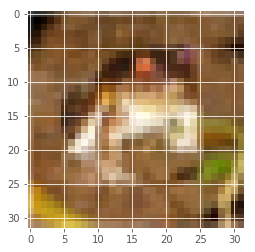

In [3]:
image = train[0][0] # 讀取圖片

plt.imshow(image)
plt.show()

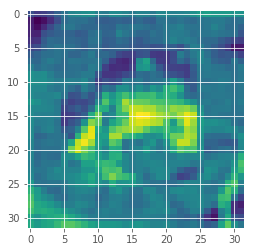

In [4]:
# 把彩色的圖片轉為灰度圖
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray)
plt.show()

通過調用 __cv2.calcHist(images, channels, mask, histSize, ranges)__ 函數來得到統計後的直方圖值

* imaages (list of array)：要分析的圖片
* channels：產生的直方圖類型。例：[0] → 灰度圖，[0, 1, 2] → RGB 三色。
* mask：optional，若有提供則僅計算 mask 部份的直方圖。
* histSize：要切分的像素強度值範圍，預設為 256。每個 channel 皆可指定一個範圍。例如，[32, 32, 32] 表示 RGB 三個 channels 皆切分為 32 區段。
* ranges：像素的範圍，預設為[0, 256]，表示 < 256。

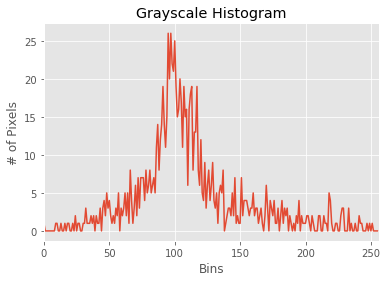

In [5]:
# 調用 cv2.calcHist 函數，回傳值就是 histogram
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

In [6]:
# 1 表示該灰度圖中，只有 1 個 pixel 的值是 0，0 個 pixel 的值是 1
print("hist shape:", hist.shape, "\n直方圖中前兩個值:", hist[:2]) 

hist shape: (256, 1) 
直方圖中前兩個值: [[1.]
 [0.]]


在 [16, 32] 這個 bin 中，color : r 有 4 個 pixels
在 [16, 32] 這個 bin 中，color : g 有 17 個 pixels
在 [16, 32] 這個 bin 中，color : b 有 108 個 pixels


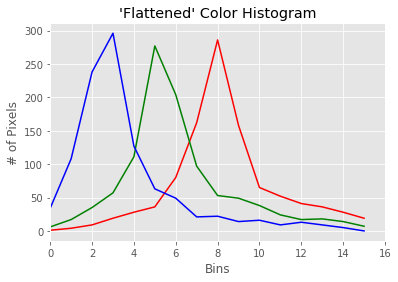

In [7]:
chans = cv2.split(image) # 把圖像的 3 個 channel 切分出來
colors = ("r", "g", "b")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

# 對於所有 channel
for (chan, color) in zip(chans, colors):
    # 計算該 channel 的直方圖
    hist = cv2.calcHist([chan], [0], None, [16], [0, 256])
    print(f'在 [16, 32] 這個 bin 中，color : {color} 有 {int(hist[1])} 個 pixels')
  
    # 畫出該 channel 的直方圖
    plt.plot(hist, color = color)
    plt.xlim([0, 16])
plt.show()